In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10am the day before the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here Pavan Yachamaneni</p>

---
# __Artificial Neural Networks 1: Pre-Class__

This Artificial Neural Networks module is from Neural Networks Demystified by @stephencwelch.  We have streamlined the content to better fit the format of the class. However, if you have questions or are just curious I highly recommend downloading everything from the following git repository.  It is a great reference to have:

    git clone https://github.com/stephencwelch/Neural-Networks-Demystified


## Learning objectives

At the end of the exercise, you should be able to:
- Explain how the architecture of an artificial neural network (ANN) is defined.
- Define key components and steps in foward propagation.
- Implement the forward propagation step.
- Gain intiitive understanding on how ANN works using Tensorlow Playground.

## Goals

1. [Introduction to Artificial Neural Networks](#The_architecture_of_Artificial_Neural_Networks)
1. [Implement forward propagation](#forward_propagation)
1. [Assess how we are doing](#assess)
1. [Exploring A Neural Network](#Exploring_A_Neural_Network)
1. [Assignment wrap-up](#wrapup)

-----
<a name="The_architecture_of_Artificial_Neural_Networks"></a>

# 1. Introduction to Artificial Neural Networks


## 1.1 The architecture of Artificial Neural Networks

&#9989; **<font color=blue>DO THIS:</font>** Watch the following video:

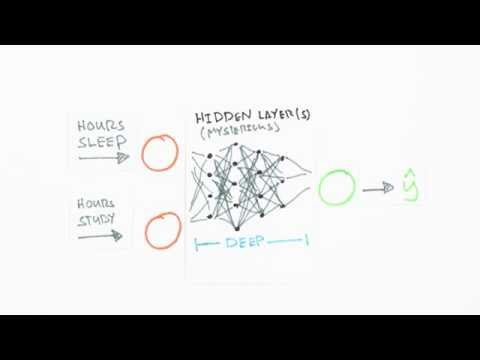

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('bxe2T-V8XRs',width=640,height=360)

&#9989; **<font color=red>QUESTION:</font>** Based on the example shown in the video, provide values for the following three variables.

In [3]:
# Put your answer here

inputLayerSize  =  2 #<-- fill in the value
outputLayerSize =  1 #<-- fill in the value
hiddenLayerSize =  3 #<-- fill in the value

## 1.2 Data flow: forward propagation

Data in a neural network flows from intput to output via a process called **forward propagation**. Watch the following video:

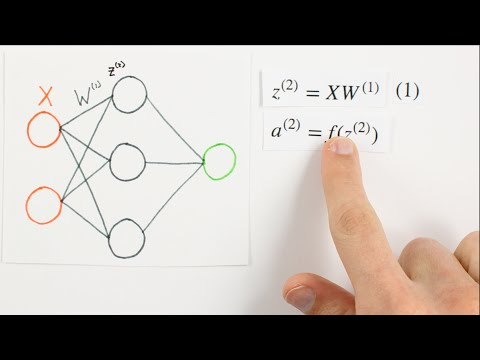

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('UJwK6jAStmg',width=640,height=360, align='Center')

&#9989; **<font color=red>QUESTION:</font>** In the video, four functions are show toward the end:

$$
z^{(2)} = XW^{(1)} \\
a^{(2)} = f(z^{(2)}) \\
z^{(3)} = a^{(2)}W^{(2)} \\
\hat{y} = f(z^{(2)}) 
$$

In the cell below, provide definitions of $X, W^{(1)}, z^{(2)}, f, a^{(2)}, W^{(2)}, z^{(3)}, \hat{y}$ and their dimensions (except $f$) based on the example in the video.

X-> imput data matrix

W2 -> Weight matrix for layer 2

Z2 -> activity of second layer

a2 -> activation function matrix for layer 2

W3 -> Weight matrix for output layer

Z3 -> activity of output layer

a3 -> activation function matrix for output layer


<font size=+3>&#9998;</font> Put your answer to the above question here

|Variable|Definition|Dimension|
|---|---|---|
|$X$      |Feature value matrix|3x2|
|$W^{(1)}$| Weight matrix for layer 2  | 2*3  |
|$z^{(2)}$| activity of second layer  |  3*3 |
|$f$      |Activation function|NA|
|$a^{(2)}$| activation function matrix for output layer  | 3*3  |
|$W^{(2)}$| Weight matrix for output layer   | 3*1  |
|$z^{(3)}$| activity of output layer  | 3*1  |
|$\hat{y}$|Output vector|3x1|


-----
<a name="steps"></a>

# 2. Implement forward propagation

We will use the data from the 1st video above to illustrate how information flow through a simple neural network:
$$X = \left[\begin{matrix} 3 & 5 \\ 5 & 1 \\ 10 & 2 \end{matrix}\right] \hspace{0.2cm} , \hspace{0.21cm}y = \left[ \begin{matrix} 75 \\ 82 \\ 93 \end{matrix}\right] $$

$X$ has a dimension of 3x2:
- Three instances (students)
- Two features (`hours_sleep`, `hours_study`)

$y$ has a dimension of 3x1:
- Grades for 3 students


## Step 1: Initialize your inputs


&#9989; **<font color=blue>DO THIS:</font>** Create two numpy arrays to store the values of the variables $X$ and $y$, as well as their normalized counterparts 
$X_{norm}$ and $y_{norm}$. Call these python variables ```X```, ```X_norm```, ```y```, and ```y_norm```.

In [13]:
# put your code here

### answer
import numpy as np

X = np.array(([3, 5],[5, 1],[10, 2]),dtype=float) # X is 3x2
y = np.array(([75], [82], [93]),dtype=float)      # y is 3x1

X_norm = X/np.max(X)
y_norm = y/100
### answer

print('X_norm=\n',X_norm)
print('y_norm=\n',y_norm)

X_norm=
 [[0.3 0.5]
 [0.5 0.1]
 [1.  0.2]]
y_norm=
 [[0.75]
 [0.82]
 [0.93]]


## Step 2:  Initialize random weights

&#9989; **<font color=blue>DO THIS:</font>** Randomly Initialize two numpy arrays ```W1``` and ```W2```, of the right dimensions, to store the weights (zero-one) in the synapses between input layer --> hidden layer, and hidden layer --> output layer, respectively.

[Note] Below we provide solution for `W1`. Go ahead and provide solution for `W2`. In the meantime, pay attention to how the random seed is generated for reproducibility purpose. [Here](https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f) is a nice article explaning why we should stop using the `numpy.random.seed()`.

In [14]:
# initialize a random number generator
rand_seed = 42
rng = np.random.default_rng(rand_seed)

W1 = rng.standard_normal((inputLayerSize, hiddenLayerSize))

# Implement W2 here:
W2 = rng.standard_normal((hiddenLayerSize,outputLayerSize))

print('W1=\n',W1, W1.shape)
print('W2=\n',W2, W2.shape)

W1=
 [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]] (2, 3)
W2=
 [[ 0.1278404 ]
 [-0.31624259]
 [-0.01680116]] (3, 1)


## Step 3: Get the weighted sum for the 2nd layer

The 2nd layer in the network is also the 1st hidden layer. The weighted sum is defined as:

$$z^{(2)} = X  W^{(1)} $$ 

&#9989; **<font color=blue>DO THIS:</font>** Run the followng to get the matrix product. 

__NOTE__: If you get an error you may have initilized the size of your variables incorrectly. Make sure the second dimention of ```X_norm``` matches the first dimention of ```W1```:

In [15]:
z2 = np.dot(X_norm, W1)

## Step 4a: Implement the activation function

In this exercise, we will use the sigmoid function:

$$f(z) = \frac{1}{1 + e^{-z}} $$ 

Where $z$ is the weighted sum matrix.

&#9989; **<font color=blue>DO THIS:</font>** Implement and test the `sigmoid` function that:

- Take as input a numpy array
- Return a numpy array of the same dimension, with the function $f$ applied to each entry.

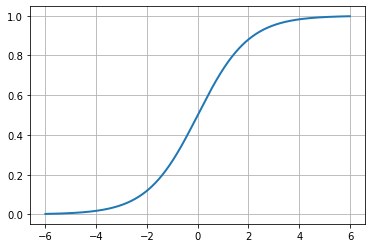

In [16]:
# your code here:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# test the function you have implemented
import matplotlib.pyplot as plt
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)
plt.grid(1)

## Step 4b: Apply the activation funciton

Next we will apply the activation function to $s^{(2)}$ to get the activity matrix of the second layer:

$$a^{(2)} = f({z^{(2)}})$$ 

&#9989; **<font color=blue>DO THIS:</font>** Write code to apply the sigmod function to $Z^{(2)}$ and display the results. Note the dimension of the matrix,

In [17]:
# your code here
a2 = sigmoid(z2)


## Step 5: Get the weigted sum for the 3rd (output) layer

Here the process becomes repetitive. This is the same as step 3 except here is for the 3rd layer. The weighted sum matrix for the 3rd layer is:

$$z^{(3)} = a^{(2)}  W^{(2)} $$ 

&#9989; **<font color=blue>DO THIS:</font>** Write code to get $z^{(3)}$ and print it out. Note the dimension of the matrix,

In [18]:
# your code here
z3 = np.dot(a2,W2)

## Step 6: Apply the activation function to weighted sum matrix

&#9989; **<font color=blue>DO THIS:</font>** Write code to apply the sigmod function to $z^{(3)}$ to produce $\hat{y}$:

$$\hat{y} = f({z^{(3)}})$$ 

In [19]:
# your code here
y_hat = sigmoid(z3)

----
<a name="assess"></a>
# 3. Assess how we are doing thus far

At this point, we have:
1. Set up a simple neural netowrk with 2 input nodes, 3 hidden nodes, and 1 output node.
2. Initialized $W^{(1)}$ and $W^{(2)}$ randomly.
3. Multiplied $X$ and $W^{(1)}$ to get weighted sums $z^{(2)}$ as input to layer 2,
4. Defined an activation function (sigmoid).
5. Applied an activation function to $z^{(2)}$ and get the activity matrix $a^{(2)}$.
6. Multiplied $a^{(2)}$ and $W^{(2)}$ to get weighted sums $z^{(3)}$ as input to layer 3,
7. Applied an activation function to $z^{(3)}$ and get the output matrix $\hat{y}$.

&#9989; **<font color=blue>DO THIS:</font>** Now compare the estimation output ($\hat{y}$) to the actual output ```y_norm```.  

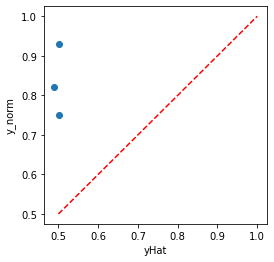

In [22]:
plt.figure(figsize=(4,4))
plt.scatter(y_hat, y_norm)
diag = np.linspace(0.5, 1, 5)
plt.plot(diag, diag, 'r--')
plt.xlabel("yHat"); plt.ylabel("y_norm")
plt.show()

Of course the results from forward propagation suck; no surprises here, the weights have not been properly chosen. That's what training a network does:  the goal is to find a combination of weights so that the result of forward propagation fits the intended output data as best as possible. 

We will be covering this topic in class.

----
<a name="Exploring_A_Neural_Network"></a>

# 4. Exploring a neural network using Pytorch

## 4.1 Playground

Please go to the following website : http://playground.tensorflow.org/

There, you'll have the opportunity to play with an actual neural network (e.g., choosing its architecture and the type of activation function) for classification purpose. 

&#9989; <font color=red>**QUESTION:**</font> Create a network the same as what we have talked about so far (3 layers: 2 input nodes, 3 hidden layer nodes, 1 output node) and run the simulation. Then play with other architectures to see if you can get to a better solution and get to it fater.

What is the architecture you most satisified with? What is the  What did you learn from this experience?

<font size=+3>&#9998;</font> Put your answer to the above question here

## 4.2 Install Pytorch for the class

Please follow the instruction from the following page to install pytorch:

https://pytorch.org/

For your info, below is a procedure using conda:



&#9989; **<font color=blue>DO THIS:</font>** Test your pytorch install and download the data we will use in class.

In [5]:
!pip install torchvision
import torch 
import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

fashion_data  =  datasets.FashionMNIST(root='./data', train=True, download=True, transform=None)
type(fashion_data)


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw




Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw




Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw




Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw




Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw




Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw




Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



torchvision.datasets.mnist.FashionMNIST

----
<a name="wrapup"></a>
# 5. Assignment wrap-up

Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment.

---------
### Congratulations, we're done!